In [1]:
from sympy import *
import numpy as np
import scipy
import scipy.optimize as opt
from matplotlib import pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')

save_path = r"C:\Users\reape\Desktop\Sp24\NPRE 455\Hw7\\"

import matplotlib as mpl
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)

# Question 1 

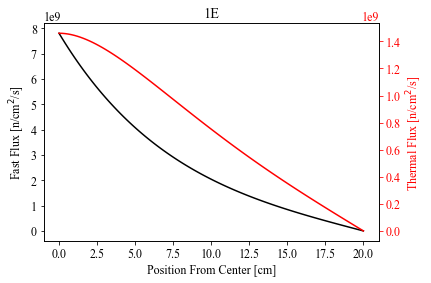

In [3]:
#1e
#Constants
S, D1, SigmaA1, SigmaS12, D2, SigmaA2, a = 10**10, 5, 0.05, 0.03, 3, 0.09, 20

L1 = (D1/(SigmaA1 + SigmaS12))**(.5)
L2 = (D2/SigmaA2)**(.5)

#Flux Profiles
x = np.linspace(0, a, 100)
phi1, phi2 = np.zeros(len(x)), np.zeros(len(x))

for i in range(len(x)):
    phi1[i] = S*L1/2/D1/np.cosh(a/L1)*np.sinh((a-x[i])/L1)
    phi2[i] = (SigmaS12*S/(1/L1**2-1/L2**2)/2/D1/D2) * (L2/np.cosh(a/L2)*np.sinh((a-x[i])/L2)-L1/np.cosh(a/L1)*np.sinh((a-x[i])/L1))

#Given Code
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(x, phi1, color='black')
ax2.plot(x, phi2, color = 'red')

ax.set_title('1E')
ax.set_xlabel('Position From Center [cm]')
ax.set_ylabel('Fast Flux [n/cm$^2$/s]')
ax2.set_ylabel('Thermal Flux [n/cm$^2$/s]')
ax2.tick_params(axis = 'y', colors='red')
ax2.yaxis.label.set_color('red')
plt.savefig(save_path+'1e.png', dpi = 600)
plt.show()

In [13]:
#1f
P_fl = 1/np.cosh(a/L1)
print('Probability of Fast Leakage:', P_fl*100)

Probability of Fast Leakage: 15.834125989920231


In [14]:
#1g
x = symbols('x')

top = SigmaS12*S/2/D1/(1/L1**2-1/L2**2)*(cosh((a-x)/L2)/cosh(a/L2)-cosh((a-x)/L1)/cosh(a/L1))
bot = -SigmaS12*S*L1**2/2/D1/cosh(a/L1)*(1-cosh((a)/L1))

Ptl = top.subs(x, a) / bot
print('Probability of Thermal Leakage:', Ptl*100)

Probability of Thermal Leakage: 13.0083680778173


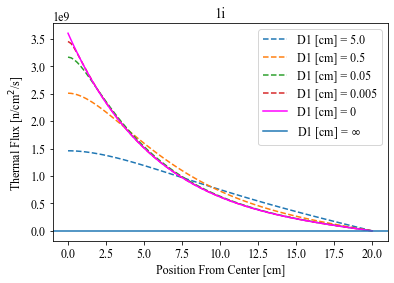

In [5]:
#1i
D1_arr = 5 * np.array([1e0, 1e-1, 1e-2, 1e-3])

#Flux 2 for non-zero D1
def flux2(D1):
    x = np.linspace(0, a, 100)
    phi2 = np.zeros(len(x))
    L1 = (D1/(SigmaA1 + SigmaS12))**(.5)

    for i in range(len(x)):
        phi2[i] = (SigmaS12*S/(1/L1**2-1/L2**2)/2/D1/D2) * (L2/np.cosh(a/L2)*np.sinh((a-x[i])/L2)-L1/np.cosh(a/L1)*np.sinh((a-x[i])/L1))
    plt.plot(x, phi2, label='D1 [cm] = {}'.format(D1), linestyle='--')

#Plotting
for i in D1_arr:
    flux2(i)
    
#Flux 2 for zero D1
x = np.linspace(0, a, 100)
phi2 = np.zeros(len(x))

for i in range(len(x)):
    phi2[i] = L2*S*SigmaS12/2/D2/(SigmaA1 + SigmaS12)/np.cosh(a/L2)*np.sinh((a-x[i])/L2)
plt.plot(x, phi2, label='D1 [cm] = 0',color='magenta')

plt.axhline(0, label='D1 [cm] = $\infty$')
plt.legend()
plt.title('1i')
plt.xlabel('Position From Center [cm]')
plt.ylabel('Thermal Flux [n/cm$^2$/s]')
plt.savefig(save_path+'1i.png', dpi = 600)
plt.show()

# Question 2

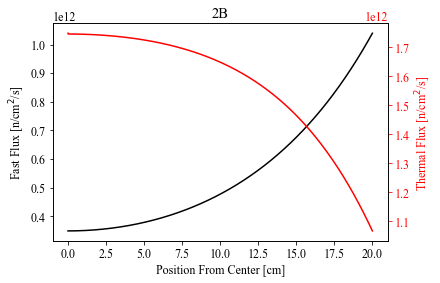

In [33]:
#2b
#Givens
S1, S2, D1, SigmaA1, SigmaS12, D2, SigmaA2, R = 10**12, 10**8, 5, 0.01, 0.09, 3, 0.01, 20
RT = R + 2*D2

L1 = (D1/(SigmaA1 + SigmaS12))**(.5)
L2 = (D2/SigmaA2)**(.5)

#Constants
C1 = S1/(np.sinh(R/L1)/2/R + D1/R/L1*np.cosh(R/L1) - D1/R**2*np.sinh(R/L1))
C4 = S2/4/np.pi/D2
C5 = -SigmaS12/D2/(1/L1**2-1/L2**2)
C3 = (-C1*C5*np.sinh(RT/L1)-C4*np.cosh(RT/L1))/np.sinh(RT/L2)

#Flux Profiles
r = np.linspace(0.001, R, 100000)
phi1, phi2 = np.zeros(len(r)), np.zeros(len(r))

for i in range(len(r)):
    phi1[i] = C1/r[i]*np.sinh(r[i]/L1)
    phi2[i] = C3/r[i]*np.sinh(r[i]/L2) + C4/r[i]*np.cosh(r[i]/L2) + C1*C5/r[i]*np.sinh(r[i]/L1)
    
#Given Code
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(r, phi1, color='black')
ax2.plot(r, phi2, color = 'red')

ax.set_title('2B')
ax.set_xlabel('Position From Center [cm]')
ax.set_ylabel('Fast Flux [n/cm$^2$/s]')
ax2.set_ylabel('Thermal Flux [n/cm$^2$/s]')
ax2.tick_params(axis = 'y', colors='red')
ax2.yaxis.label.set_color('red')
plt.savefig(save_path+'2B.png', dpi = 600)
plt.show()

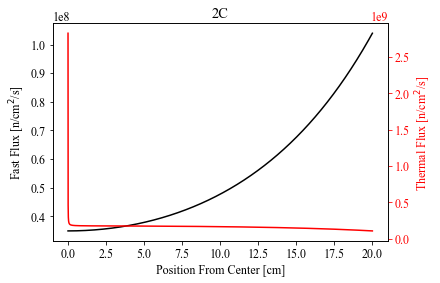

In [32]:
#2C
#Givens
S1, S2, D1, SigmaA1, SigmaS12, D2, SigmaA2, R = 10**8, 10**8, 5, 0.01, 0.09, 3, 0.01, 20
RT = R + 2*D2

L1 = (D1/(SigmaA1 + SigmaS12))**(.5)
L2 = (D2/SigmaA2)**(.5)

#Constants
C1 = S1/(np.sinh(R/L1)/2/R+D1/R/L1*np.cosh(R/L1)-D1/R**2*np.sinh(R/L1))
C4 = S2/4/np.pi/D2
C5 = -SigmaS12/D2/(1/L1**2-1/L2**2)
C3 = (-C1*C5*np.sinh(RT/L1)-C4*np.cosh(RT/L1))/np.sinh(RT/L2)

#Flux Profiles
r = np.linspace(0.001, R, 100000)
phi1, phi2 = np.zeros(len(r)), np.zeros(len(r))

for i in range(len(r)):
    phi1[i] = C1/r[i]*np.sinh(r[i]/L1)
    phi2[i] = C3/r[i]*np.sinh(r[i]/L2) + C4/r[i]*np.cosh(r[i]/L2) + C1*C5/r[i]*np.sinh(r[i]/L1)

#Given Code
fig, ax = plt.subplots()
ax2 = ax.twinx()
ax.plot(r, phi1, color='black')
ax2.plot(r, phi2, color = 'red')

ax.set_title('2C')
ax.set_xlabel('Position From Center [cm]')
ax.set_ylabel('Fast Flux [n/cm$^2$/s]')
ax2.set_ylabel('Thermal Flux [n/cm$^2$/s]')
ax2.tick_params(axis = 'y', colors='red')
ax2.yaxis.label.set_color('red')
plt.savefig(save_path+'2C.png', dpi = 600)
plt.show()